In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_excel('Restaurant-Reviews.xlsx')

In [ ]:
df.shape

(992, 6)

In [4]:
df.head()

,Review,Liked,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Wow... Loved this place.,1,NaN,NaN,NaN,NaN
1,Crust is not good.,0,NaN,NaN,NaN,NaN
2,Not tasty and the texture was just nasty.,0,NaN,NaN,NaN,NaN
3,Stopped by during the late May bank holiday of...,1,NaN,NaN,NaN,NaN
4,The selection on the menu was great and so wer...,1,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,Review,Liked,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
987,I think food should have flavor and texture an...,0,NaN,NaN,NaN,NaN
988,Appetite instantly gone.,0,NaN,NaN,NaN,NaN
989,Overall I was not impressed and would not go b...,0,NaN,NaN,NaN,NaN
990,The whole experience was underwhelming,and I think we'll just go to Ninja Sushi next...,0,NaN,NaN,NaN
991,Then,as if I hadn't wasted enough of my life there,they poured salt in the wound by drawing out ...,0,NaN,NaN


##### Null values details

In [6]:
df.isnull().sum()

Review          0
Liked           0
Unnamed: 2    705
Unnamed: 3    929
Unnamed: 4    980
Unnamed: 5    991
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Review      992 non-null    object 
 1   Liked       992 non-null    object 
 2   Unnamed: 2  287 non-null    object 
 3   Unnamed: 3  63 non-null     object 
 4   Unnamed: 4  12 non-null     object 
 5   Unnamed: 5  1 non-null      float64
dtypes: float64(1), object(5)
memory usage: 46.6+ KB


##### filled Null values with Space

In [8]:
df= df.fillna(' ')

In [9]:
df.head()

,Review,Liked,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Wow... Loved this place.,1,,,,
1,Crust is not good.,0,,,,
2,Not tasty and the texture was just nasty.,0,,,,
3,Stopped by during the late May bank holiday of...,1,,,,
4,The selection on the menu was great and so wer...,1,,,,


### Combining all columns  into one column

In [10]:
Columns = df.columns
Columns

Index(['Review', 'Liked', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5'],
      dtype='object')

In [11]:
df['Review_Combined'] = df[Columns].apply(lambda  row:' '.join(row.values.astype(str)), axis=1)

In [12]:
df.head()

,Review,Liked,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Review_Combined
0,Wow... Loved this place.,1,,,,,Wow... Loved this place. 1
1,Crust is not good.,0,,,,,Crust is not good. 0
2,Not tasty and the texture was just nasty.,0,,,,,Not tasty and the texture was just nasty. 0 ...
3,Stopped by during the late May bank holiday of...,1,,,,,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...,1,,,,,The selection on the menu was great and so wer...


In [13]:
df['Review_Combined']

0                     Wow... Loved this place. 1        
1                           Crust is not good. 0        
2      Not tasty and the texture was just nasty. 0   ...
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
987    I think food should have flavor and texture an...
988                   Appetite instantly gone. 0        
989    Overall I was not impressed and would not go b...
990    The whole experience was underwhelming  and I ...
991    Then  as if I hadn't wasted enough of my life ...
Name: Review_Combined, Length: 992, dtype: object

#### Removing unwated spaces of starting and ending of reviews..

In [14]:
df.loc[6,'Review_Combined']

"Honeslty it didn't taste THAT fresh.) 0        "

In [15]:
df['Review_Combined_1'] = df['Review_Combined'].str.strip()

In [16]:
df.loc[6,'Review_Combined_1']

"Honeslty it didn't taste THAT fresh.) 0"

#### Spliting the Review & liked columns data into separate Columns using split & Index function.

In [17]:
df['Liked1'] = df['Review_Combined_1'].str.split().str[-1]

In [18]:
df['Review1'] = df['Review_Combined_1'].str.replace('1','')

In [19]:
df['Review1'] = df['Review1'].str.replace('0','')

In [20]:
df.head()

,Review,Liked,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Review_Combined,Review_Combined_1,Liked1,Review1
0,Wow... Loved this place.,1,,,,,Wow... Loved this place. 1,Wow... Loved this place. 1,1,Wow... Loved this place.
1,Crust is not good.,0,,,,,Crust is not good. 0,Crust is not good. 0,0,Crust is not good.
2,Not tasty and the texture was just nasty.,0,,,,,Not tasty and the texture was just nasty. 0 ...,Not tasty and the texture was just nasty. 0,0,Not tasty and the texture was just nasty.
3,Stopped by during the late May bank holiday of...,1,,,,,Stopped by during the late May bank holiday of...,Stopped by during the late May bank holiday of...,1,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...,1,,,,,The selection on the menu was great and so wer...,The selection on the menu was great and so wer...,1,The selection on the menu was great and so wer...


### Converted into Integer values

In [21]:
df['Liked1']=df['Liked1'].astype(float)
df['Liked1']=df['Liked1'].astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review             992 non-null    object
 1   Liked              992 non-null    object
 2   Unnamed: 2         992 non-null    object
 3   Unnamed: 3         992 non-null    object
 4   Unnamed: 4         992 non-null    object
 5   Unnamed: 5         992 non-null    object
 6   Review_Combined    992 non-null    object
 7   Review_Combined_1  992 non-null    object
 8   Liked1             992 non-null    int32 
 9   Review1            992 non-null    object
dtypes: int32(1), object(9)
memory usage: 73.8+ KB


In [23]:
df.tail()

,Review,Liked,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Review_Combined,Review_Combined_1,Liked1,Review1
987,I think food should have flavor and texture an...,0,,,,,I think food should have flavor and texture an...,I think food should have flavor and texture an...,0,I think food should have flavor and texture an...
988,Appetite instantly gone.,0,,,,,Appetite instantly gone. 0,Appetite instantly gone. 0,0,Appetite instantly gone.
989,Overall I was not impressed and would not go b...,0,,,,,Overall I was not impressed and would not go b...,Overall I was not impressed and would not go b...,0,Overall I was not impressed and would not go b...
990,The whole experience was underwhelming,and I think we'll just go to Ninja Sushi next...,0,,,,The whole experience was underwhelming and I ...,The whole experience was underwhelming and I ...,0,The whole experience was underwhelming and I ...
991,Then,as if I hadn't wasted enough of my life there,they poured salt in the wound by drawing out ...,0,,,Then as if I hadn't wasted enough of my life ...,Then as if I hadn't wasted enough of my life ...,0,Then as if I hadn't wasted enough of my life ...


#### Creating Separate DataFrame

In [24]:
df = df[['Review1','Liked1']]

In [25]:
df.head()

,Review1,Liked1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [26]:
df.tail()

,Review1,Liked1
987,I think food should have flavor and texture an...,0
988,Appetite instantly gone.,0
989,Overall I was not impressed and would not go b...,0
990,The whole experience was underwhelming and I ...,0
991,Then as if I hadn't wasted enough of my life ...,0


In [27]:
df['Review1'].iloc[3]

'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it. '

#### Removing Special Character from Reviews.

In [28]:
df['Review1'] = df['Review1'].str.replace('[^\w\s]','')

C:\Users\Rakshithraju\AppData\Local\Temp\ipykernel_13420\2139540098.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Review1'] = df['Review1'].str.replace('[^\w\s]','')


In [29]:
df['Review1']

0                                  Wow Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
987    I think food should have flavor and texture an...
988                             Appetite instantly gone 
989    Overall I was not impressed and would not go b...
990    The whole experience was underwhelming  and I ...
991    Then  as if I hadnt wasted enough of my life t...
Name: Review1, Length: 992, dtype: object

In [30]:
df.head()

,Review1,Liked1
0,Wow Loved this place,1
1,Crust is not good,0
2,Not tasty and the texture was just nasty,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


## Data Extraction through web.

In [31]:
import requests
from bs4 import BeautifulSoup

In [32]:
url = ["https://www.dineout.co.in/bangalore/the-bangalore-cafe-shanti-nagar-central-bangalore-48391/review?revpage=6",
       "https://www.dineout.co.in/bangalore/abs-absolute-barbecues-btm-layout-south-bangalore-20192/review?revpage=8",
       "https://www.dineout.co.in/bangalore/hammered-cunningham-road-central-bangalore-23017/review?revpage=7",
       "https://www.dineout.co.in/bangalore/mainland-china-church-street-central-bangalore-3357/review?revpage=5",
       "https://www.dineout.co.in/bangalore/ka-01-richmond-town-central-bangalore-57576/review?revpage=6",
       "https://www.dineout.co.in/bangalore/khandani-rajdhani-rajajinagar-west-bangalore-8640/review?revpage=6",
       "https://www.dineout.co.in/bangalore/hard-rock-cafe-st-marks-road-central-bangalore-1350/review?revpage=7",
       "https://www.dineout.co.in/bangalore/the-biere-club-vittal-mallya-road-central-bangalore-1168/review?revpage=10",
       "https://www.dineout.co.in/bangalore/smoke-the-sizzler-house-koramangala-south-bangalore-1293/review?revpage=4",
      "https://www.dineout.co.in/bangalore/badmaash-vittal-mallya-road-central-bangalore-87534/review",
      "https://www.dineout.co.in/bangalore/indigo-xp-koramangala-south-bangalore-1124/review?revpage=4",
      "https://www.dineout.co.in/bangalore/vapour-pub-and-brewery-indiranagar-east-bangalore-702/review?revpage=7"]
url

['https://www.dineout.co.in/bangalore/the-bangalore-cafe-shanti-nagar-central-bangalore-48391/review?revpage=6',
 'https://www.dineout.co.in/bangalore/abs-absolute-barbecues-btm-layout-south-bangalore-20192/review?revpage=8',
 'https://www.dineout.co.in/bangalore/hammered-cunningham-road-central-bangalore-23017/review?revpage=7',
 'https://www.dineout.co.in/bangalore/mainland-china-church-street-central-bangalore-3357/review?revpage=5',
 'https://www.dineout.co.in/bangalore/ka-01-richmond-town-central-bangalore-57576/review?revpage=6',
 'https://www.dineout.co.in/bangalore/khandani-rajdhani-rajajinagar-west-bangalore-8640/review?revpage=6',
 'https://www.dineout.co.in/bangalore/hard-rock-cafe-st-marks-road-central-bangalore-1350/review?revpage=7',
 'https://www.dineout.co.in/bangalore/the-biere-club-vittal-mallya-road-central-bangalore-1168/review?revpage=10',
 'https://www.dineout.co.in/bangalore/smoke-the-sizzler-house-koramangala-south-bangalore-1293/review?revpage=4',
 'https://www

In [33]:
len(url)

12

In [34]:
Review = []
liked= []
for url in url:
    res=requests.get(url)
    soup = BeautifulSoup(res.content, 'html.parser')
    Reviews = soup.find_all('span',class_="more")
    for i in range(len(Reviews)):
        Review.append(Reviews[i].get_text())
        
    rating = soup.find_all('div',attrs={'class':'review-post'})
    for rating in rating:
        rating_dev = rating.find('div',attrs={'class':'right'})
        star = rating_dev.select_one('p.fs12 > span.stars')
        liked.append(len(star.find_all(attrs={'class':'do-star'})))

In dine-out website Extracted 482 Reviews. 

In [35]:
len(Review), len(liked)

(482, 482)

In [36]:
df1 = pd.DataFrame(list(zip(Review,liked)), columns =['Review','liked'])
df1.head()

,Review,liked
0,delyed service,3
1,Had a great time,4
2,amazing food amazing service,5
3,Very slow service Food was average.\n50% of th...,1
4,not worth the price...very expensive....Instea...,1


In [37]:
df1['Review'] = df1['Review'].str.replace('\n','')
df1['Review'].iloc[3]

"Very slow service Food was average.50% of there Menu aren't available.The gap between Starters and Main course was about 30min.For giving bill again they took 30minSpoke to Mr.Rahul (owner) who rudely said we have reduced our staff from 100 to 35 so u need to adjust. Have you reduced your prices for this service - NOHave you reduced the occupancy -No (but have less Staff)WHEN WE ARE PAYING FULL AMOUNT THEN WHY SHOULD WE ADJUST.And when suggestion is given kindly acknowledge don't just walk off ignoring it. "

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  482 non-null    object
 1   liked   482 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.7+ KB


([<matplotlib.patches.Wedge at 0x213f97e6250>,
 [Text(0.3859368723038094, 1.0300741383979861, '5'),
  Text(-1.0924383813536083, 0.12875706949720664, '3'),
  Text(-0.5603157110974357, -0.946597223689873, '4'),
  Text(0.596896582979617, -0.9239667035273821, '1'),
  Text(1.0731002878738265, -0.24177628536544093, '2')])

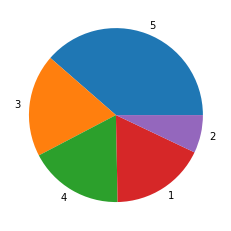

In [39]:
ratings = df1['liked'].value_counts()
plt.pie(ratings,labels=ratings.index)

Observation:- Max number of reviews belongs to 5 star rating & Less number of reviews belongs to 2 star rating.

##### 3 and Above star ratings are converted to 1 & less then 3 ratings are converted to 0.

In [40]:
df1['liked'].replace(to_replace ={1:0,2:0,3:1,4:1,5:1}, inplace=True)

In [41]:
df1.tail()

,Review,liked
477,Music and ambience was awesome. Food is below ...,1
478,music,1
479,you,1
480,main dishes quality def needs improvement..sta...,1
481,The food is tasty.,1


#### Removing Special Character from Reviews.

In [42]:
df1['Review'] = df1['Review'].str.replace('[^\w\s]','')

C:\Users\Rakshithraju\AppData\Local\Temp\ipykernel_13420\4058777962.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Review'] = df1['Review'].str.replace('[^\w\s]','')


In [43]:
ratings = df1['liked'].value_counts()
ratings

1    363
0    119
Name: liked, dtype: int64

In [44]:
df1.to_csv('Data Extraction.csv')

In [45]:
df.to_csv('Restaurant-Reviews.csv')

### Adding extracted reviews into main reviews dataframe

In [46]:
df1 =pd.read_csv('Data Extraction.csv')
df =pd.read_csv('Restaurant-Reviews.csv')

In [47]:
df1.head()

,Unnamed: 0,Review,liked
0,0,delyed service,1
1,1,Had a great time,1
2,2,amazing food amazing service,1
3,3,Very slow service Food was average50 of there ...,0
4,4,not worth the pricevery expensiveInstead head ...,0


In [48]:
df1.drop(['Unnamed: 0'],axis=1,inplace=True)
df1.head()

,Review,liked
0,delyed service,1
1,Had a great time,1
2,amazing food amazing service,1
3,Very slow service Food was average50 of there ...,0
4,not worth the pricevery expensiveInstead head ...,0


#### Drooping null values 

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  477 non-null    object
 1   liked   482 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.7+ KB


In [50]:
df1.isnull().sum()

Review    5
liked     0
dtype: int64

In [51]:
df1 = df1.dropna()
df1.isnull().sum()

Review    0
liked     0
dtype: int64

In [52]:
df.head()

,Unnamed: 0,Review1,Liked1
0,0,Wow Loved this place,1
1,1,Crust is not good,0
2,2,Not tasty and the texture was just nasty,0
3,3,Stopped by during the late May bank holiday of...,1
4,4,The selection on the menu was great and so wer...,1


In [53]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,Review1,Liked1
0,Wow Loved this place,1
1,Crust is not good,0
2,Not tasty and the texture was just nasty,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [54]:
df.rename(columns= {'Review1':'Review','Liked1':'liked'},inplace=True)

### Adding 2 datasets reviews and liked columns into 1 dataset. 

In [55]:
dataset = pd.concat([df,df1],ignore_index=True)

In [56]:
dataset.head()

,Review,liked
0,Wow Loved this place,1
1,Crust is not good,0
2,Not tasty and the texture was just nasty,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [57]:
dataset.tail()

,Review,liked
1464,Music and ambience was awesome Food is below a...,1
1465,music,1
1466,you,1
1467,main dishes quality def needs improvementstart...,1
1468,The food is tasty,1


In [58]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1469 non-null   object
 1   liked   1469 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 23.1+ KB


##  Exploratory Data Analysis

In [59]:
ratings = dataset['liked'].value_counts()
ratings

1    855
0    614
Name: liked, dtype: int64

([<matplotlib.patches.Wedge at 0x213f43976d0>,
 [Text(-0.2803432626027691, 1.0636764804738492, '1'),
  Text(0.28034316301418793, -1.0636765067214753, '0')])

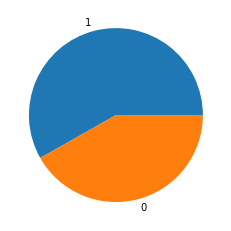

In [60]:
plt.pie(ratings,labels=ratings.index)

Observation:- 855 reviews are Liked & 614 reviews are not liked.

Observation:- Majority of reviews are +ve reviews.

In [61]:
dataset['liked'].mean()

0.5820285908781484

Observation:- 58% of reviews belong to 1 ratring & 42% of reviews belong to 0 Rating.

In [62]:
dataset.describe()

,liked
count,1469.000000
mean,0.582029
std,0.493393
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [63]:
dataset.isnull().sum()

Review    0
liked     0
dtype: int64

Observation:- There are 0 Null values present dataset.

In [64]:
import missingno as msno

<AxesSubplot:>

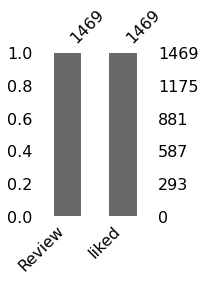

In [65]:
msno.bar(dataset,figsize = (2,3))

###  Feature Engineering 

Cleaning the Text.

    1. Converting Data into lower case.

    2.Remove the stop words.

    3.Stemming Each words.

In [66]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1469 non-null   object
 1   liked   1469 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 23.1+ KB


### Data Preprocessing.

In [67]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rakshithraju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rakshithraju\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rakshithraju\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Data Preprocessing using Stemming.

In [68]:
stemm_reviews = []
for i in range(0,1469):
    review = re.sub('[^a-zA-Z]', ' ',dataset['Review'][i]) #Cleaning the data
    review = review.lower()   # Converting into lower case
    review = nltk.word_tokenize(review) #Tokenization
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not') # Removing 'Not' from stop words.
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)] #Removing Stop words and stemming each word.
    review = ' '.join(review) # Joining each word
    stemm_reviews.append(review)

### DATA Preprocessing using Lemmatization 

In [69]:
Lemma_reviews = []
for i in range(0,1469):
    review = re.sub('[^a-zA-Z]', ' ',dataset['Review'][i]) # Cleaning the data
    review = review.lower()  # Converting into lower case
    review = nltk.word_tokenize(review) #Tokenization
    lemm = WordNetLemmatizer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not') # Removing 'Not' from stop words
    review = [lemm.lemmatize(word) for word in review if not word in set(all_stopwords)]# Removing Stop words Lemmatizing each word.
    review = ' '.join(review) # Joining each word
    Lemma_reviews.append(review)

In [70]:
stemm_reviews

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti didnt tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberrymmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'that rightth red velvet cakeohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like

In [71]:
Lemma_reviews

['wow loved place',
 'crust not good',
 'not tasty texture nasty',
 'stopped late may bank holiday rick steve recommendation loved',
 'selection menu great price',
 'getting angry want damn pho',
 'honeslty didnt taste fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fry great',
 'great touch',
 'service prompt',
 'would not go back',
 'cashier care ever say still ended wayyy overpriced',
 'tried cape cod ravoli chicken cranberrymmmm',
 'disgusted pretty sure human hair',
 'shocked sign indicate cash',
 'highly recommended',
 'waitress little slow service',
 'place not worth time let alone vega',
 'not like',
 'burrittos blah',
 'food amazing',
 'service also cute',
 'could care le interior beautiful',
 'performed',
 'thats rightthe red velvet cakeohhh stuff good',
 'never brought salad asked',
 'hole wall great mexican street taco friendly staff',
 'took hour get food table restaurant food luke warm sever running around like totally overwhelmed',
 'worst salmon 

In [72]:
df_clean= pd.DataFrame(Lemma_reviews,columns = ['Review'])
df_clean['liked']=dataset['liked']

In [73]:
df_clean

,Review,liked
0,wow loved place,1
1,crust not good,0
2,not tasty texture nasty,0
3,stopped late may bank holiday rick steve recom...,1
4,selection menu great price,1
...,...,...
1464,music ambience awesome food average bouncer be...,1
1465,music,1
1466,,1
1467,main dish quality def need improvementstarters...,1


In [74]:
df_clean['liked'].value_counts()

1    855
0    614
Name: liked, dtype: int64

Observation :- Cleaned the reviews using Stemming & Lemmatization method, we use the Lemmatization method to build a DL Model because, in the Lemmatization method we got more meaningful words than stemming.

### Creating train and test

In [75]:
x = df_clean['Review']
y = df_clean['liked']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [76]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1175,), (294,), (1175,), (294,))

In [77]:
y_train

1220    1
1163    1
1233    1
568     0
1391    1
       ..
763     1
835     0
1216    0
559     1
684     1
Name: liked, Length: 1175, dtype: int64

### Converting Text into Numerical value by using Keras Tokenizer.

In [78]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

In [79]:
tokenizer = Tokenizer(num_words = 2000, split = ' ')

In [80]:
tokenizer.fit_on_texts(X_train.astype(str).values)

In [81]:
train_tweets = tokenizer.texts_to_sequences(X_train.astype(str).values)
train_tweets[:5]

[[6, 1],
 [15, 2, 200, 43, 9, 1, 32, 413, 33, 8],
 [4, 49, 20],
 [919, 101, 160, 920, 55],
 [921]]

In [82]:
test_tweets = tokenizer.texts_to_sequences(X_test.astype(str).values)
test_tweets[:5]

[[498, 243, 182, 402, 1323, 106],
 [325, 46, 15, 25, 1200, 176, 158, 829, 830, 15, 4, 1447, 1],
 [15, 736, 5, 502],
 [606, 1537],
 [1493, 103, 18, 3]]

In [83]:
max_len = max([len(i) for i in train_tweets])
max_len

88

In [84]:
max_len1 = max([len(i) for i in test_tweets])
max_len1

36

In [85]:
train_tweets = pad_sequences(train_tweets, maxlen = max_len)
train_tweets[:2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   6,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         15,   2, 200,  43,   9,   1,  32, 413,  33,   8]])

In [86]:
test_tweets = pad_sequences(test_tweets, maxlen = max_len)
test_tweets[:2]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,  498,  243,  182,  402, 1323,  106],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,

### Saving My tokenizer to use in Feature to predict my sentiment. 

In [87]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Building The LSTM model Architecture

In [88]:
import os
import tensorflow
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D ,Conv1D , GlobalMaxPool1D

In [100]:
model = Sequential()
model.add(Embedding(2500, 128, input_length = train_tweets.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(526, dropout = 0.2, return_sequences=True))
model.add(LSTM(256, dropout = 0.2, return_sequences=True))
#model.add(Conv1D(100, 5, activation='relu'))
#model.add(GlobalMaxPool1D())
#model.add(Dense(16, activation='relu'))
#model.add(SpatialDropout1D(0.2))
model.add(LSTM(516, dropout = 0.2))
#model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 88, 128)           320000    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 88, 128)          0         
 lDropout1D)                                                     
                                                                 
 lstm_3 (LSTM)               (None, 88, 526)           1378120   
                                                                 
 lstm_4 (LSTM)               (None, 88, 256)           801792    
                                                                 
 lstm_5 (LSTM)               (None, 516)               1595472   
                                                                 
 dense_2 (Dense)             (None, 1)                 517       
                                                      

### Training The MODEL with 20 Epochs 

In [101]:
history = model.fit(train_tweets,(y_train).values, epochs = 20, batch_size =64, validation_split = 0.20)
print(history)

Epoch 1/20
15/15 [==============================] - 67s 4s/step - loss: 0.6789 - accuracy: 0.5851 - val_loss: 0.6857 - val_accuracy: 0.5660
Epoch 2/20
15/15 [==============================] - 55s 4s/step - loss: 0.6741 - accuracy: 0.5957 - val_loss: 0.6699 - val_accuracy: 0.5745
Epoch 3/20
15/15 [==============================] - 55s 4s/step - loss: 0.5521 - accuracy: 0.7202 - val_loss: 0.5354 - val_accuracy: 0.7872
Epoch 4/20
15/15 [==============================] - 56s 4s/step - loss: 0.3479 - accuracy: 0.8596 - val_loss: 0.4643 - val_accuracy: 0.7702
Epoch 5/20
15/15 [==============================] - 56s 4s/step - loss: 0.1827 - accuracy: 0.9287 - val_loss: 0.5641 - val_accuracy: 0.7830
Epoch 6/20
15/15 [==============================] - 56s 4s/step - loss: 0.1144 - accuracy: 0.9479 - val_loss: 0.6823 - val_accuracy: 0.7660
Epoch 7/20
15/15 [==============================] - 56s 4s/step - loss: 0.0660 - accuracy: 0.9766 - val_loss: 0.8584 - val_accuracy: 0.7489
Epoch 8/20
15/15 [==

### Evaluating the Model

In [102]:
score, accuracy = model.evaluate(test_tweets, (y_test).values, batch_size = 64)
print("Test accuracy: {}".format(accuracy))

5/5 [==============================] - 6s 1s/step - loss: 1.2634 - accuracy: 0.7789
Test accuracy: 0.7789115905761719


In [103]:
pred_y = model.predict(test_tweets)

10/10 [==============================] - 10s 840ms/step


In [104]:
pred_y[-10:]

array([[9.7937761e-03],
       [5.2966927e-05],
       [5.3457195e-01],
       [1.6119401e-01],
       [2.0712782e-03],
       [1.5736179e-02],
       [2.4571452e-02],
       [9.9915308e-01],
       [9.9999070e-01],
       [9.9997240e-01]], dtype=float32)

In [105]:
y_test[-10:]

270     0
923     0
1175    1
984     0
1326    0
546     0
613     0
124     1
198     1
801     1
Name: liked, dtype: int64

## Predicting My model with Reviews.

## Saving the model

In [106]:
filename = 'sentimental_analysis_model'
model.save(filename)

INFO:tensorflow:Assets written to: sentimental_analysis_model\assets


INFO:tensorflow:Assets written to: sentimental_analysis_model\assets


### Loading my model.

In [107]:
from tensorflow.keras.models import load_model

In [108]:
filename = 'sentimental_analysis_model'
loaded_model = load_model(filename)

In [109]:
def Reviews(Review):
    Lemma_reviews = []
    review = re.sub('[^a-zA-Z]', ' ',Review) # Cleaning the data
    review = review.lower()  # Converting into lower case
    review = nltk.word_tokenize(review) #Tokenization
    lemm = WordNetLemmatizer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not') # Removing 'Not' from stop words
    review = [lemm.lemmatize(word) for word in review if not word in set(all_stopwords)]# Removing Stop words Lemmatizing each word.
    review = ' '.join(review) # Joining each word
    Lemma_reviews.append(review)
    Review = tokenizer.texts_to_sequences(Lemma_reviews)
    Review = pad_sequences(Review, maxlen = 88)
    Output = loaded_model.predict(Review)
    print(Output)

In [113]:
Review = ("BAD FOOD SERVICE")
Reviews(Review)

1/1 [==============================] - 0s 135ms/step
[[0.12159212]]
